# Sexual Violence: A Story Through Data

The world's conversation around sexual assault, domestic violence, and related topics is changing rapidly. ***What is a the reality of sexual assault in the U.S.A and globally?***

*Note:* There is a lot of terms that can be used to describe sexual violence: this includes rape, sexual assault, violence against women, domestic violence, and intimate partner violence. To better clarify data, each visualization will credit the data source and how the owning organization defines the violence. 

## By The Numbers...

### 1. WHO - Non-Partner Sexual Violence

[The World Health Association (WHO)](https://www.who.int/) provides a variety of publicly available data in the [Global Health Observatory data repository](http://apps.who.int/gho/data/node.home). The first data source we ae going to look at to understand sexual violence is [Non-partner sexual violence prevalence: Data by WHO income region](http://apps.who.int/gho/data/node.main.NPSV?lang=en). Non-partner means "strangers, acquaintances, friends, colleagues, peers, teachers, neighbours and family members" and sexual violence is an umbrella term for any type of sexual violence. This data was gathered on women ages 15-69 in 2010. 

In [1]:
# import libraries needed for entire Jupyter Notebook
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import folium
import requests
from bs4 import BeautifulSoup 
from IPython.core.display import display, HTML

# reading csv file for WHO Non-Partner Sexual Violence 
who1 = pd.read_csv("./datasources/WHO-nonpartnerviolence.csv") 
# clean up the table by taking columns
who1.drop(who1.columns.difference(['WHOINCOMEREGION (DISPLAY)','Numeric', 'Low', 'High']), 1, inplace=True)
who1 = who1.rename(columns={'WHOINCOMEREGION (DISPLAY)': 'Region'})
who1 = who1.dropna()
print(who1)

                                              Region   Numeric      Low  \
1  Low- and middle-income countries of the Europe...   5.24759  0.77092   
2  Low- and middle-income countries of the South-...   4.94191  0.97722   
3  Low- and middle-income countries of the Wester...   6.81255  1.67485   
4              High-income countries for all regions  12.58295  8.92547   
5  Low- and middle-income countries of the Africa...  11.91790  8.52057   
6   Low- and middle-income countries of the Americas  10.69660  7.01617   
7                                              World   7.17237  5.25120   

       High  
1   9.72426  
2   8.90660  
3  11.95026  
4  16.24044  
5  15.31522  
6  14.37702  
7   9.09353  


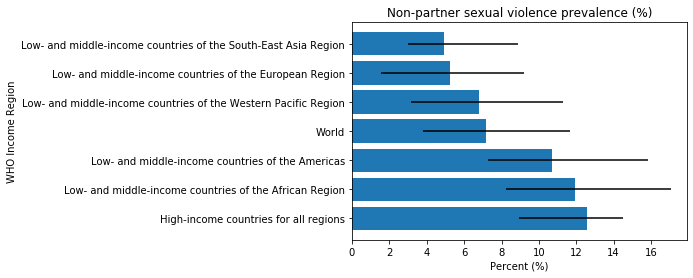

In [2]:
# sort from largest prevalance 
who1 = who1.sort_values(by='Numeric', ascending=False).reset_index(drop=True)

# represent this data as a bar graph which show the high, low, and numeric value
who1['low_diff'] = who1['Numeric'] - who1['Low']
who1['high_diff'] = who1['High'] - who1['Numeric'] 
err = who1[['low_diff','high_diff']].to_numpy().reshape(2,7)
plt.barh(tick_label=who1.Region, width=who1.Numeric, y=list(who1.index) , xerr=err)
plt.title('Non-partner sexual violence prevalence (%)')
plt.ylabel('WHO Income Region')
plt.xlabel('Percent (%)')
plt.show()

This data, which compares the prevalance of non-partner sexual violence in low- and middle-income regions to the general world and high-income regions, reveals the shocking scale of sexual violence. **On average, globally, about 7% of women could be a victim of sexual violence from a non-partner**.

*Note:* This data may be inaccaurate depending on how often victims actually report violence to their governing bodies. 

### 2. WHO - Intimate Partner Violence

This data was also retrieved from [The World Health Association (WHO)](https://www.who.int/) [Global Health Observatory data repository](http://apps.who.int/gho/data/node.home). This data source has country-by-country data on [Intimate partner violence prevalence](http://apps.who.int/gho/data/node.main.IPV?lang=en). WHO defines intimate partner violence as ["physical, sexual, and emotional abuse and controlling behaviours by an intimate partner."](https://apps.who.int/iris/bitstream/handle/10665/77432/WHO_RHR_12.36_eng.pdf;jsessionid=0040EFA9D6081C8434920951272B3E4D?sequence=1) I chose to pick out the aggregate age group (15-49) and represented IPV within the last 12 months. 

In [3]:
# reading csv file for WHO IPV
who2 = pd.read_csv("./datasources/WHO-IPV.csv") 
who2.drop(who2.columns.difference(['COUNTRY (CODE)', 'AGEGROUP (DISPLAY)', 'Numeric', 'REGION (DISPLAY)']), 1, inplace=True)
who2 = who2.rename(columns={'COUNTRY (CODE)': 'Code', 'AGEGROUP (DISPLAY)': 'Age', 'REGION (DISPLAY)': 'Region'})
who2 = who2[who2['Age'] == '15-49 years']
who2.head()

,Region,Code,Age,Numeric
3,Eastern Mediterranean,AFG,15-49 years,46.1
14,Africa,AGO,15-49 years,25.9
22,Europe,AZE,15-49 years,9.8
32,South-East Asia,BGD,15-49 years,28.8
36,Europe,ARM,15-49 years,3.5


In [4]:
# Get the GeoJSON data you need for choropleth map
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

# Visual IPV
m = folium.Map(location=[0, 0], zoom_start=2)
folium.Choropleth(
    geo_data=country_shapes,
    name='choropleth',
    data=who2,
    columns=['Code', 'Numeric'],
    key_on='feature.id',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='women and girls subjected intimate partner violence in the previous 12 months (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m

Dark grey represents countries that do not have data on Intimate Partner Violence in WHO's data collection. The lighter pinks represent a lower percentage of IPV. To look at trends, broken down by WHO region, we can find some summary statistics like mean, median, and mode. 

Eastern Mediterranean: N = 3
Africa: N = 30
Europe: N = 7
South-East Asia: N = 6
Americas: N = 15
Western Pacific: N = 14


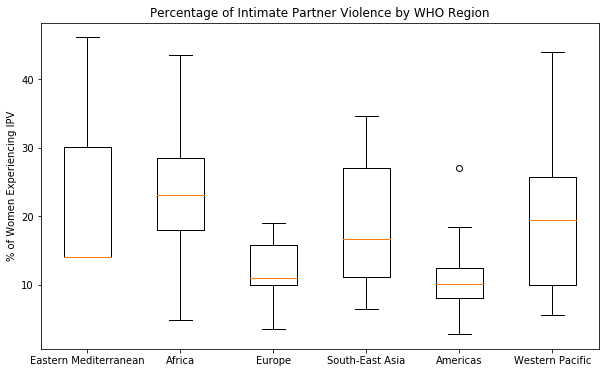

In [5]:
# Boxplot showing the distribution of adult literacy rates by continent
fig1, ax1 = plt.subplots(figsize=(10, 6))
arr = []
ax1.set_title('Percentage of Intimate Partner Violence by WHO Region')
continents = who2['Region'].unique()
continents = [x for x in continents if str(x) != 'nan']
for continent in continents:
    temp = who2[who2.Region == continent]
    print(continent + ": N = " + str(len(temp.index)))
    arr.append(temp['Numeric'])
ax1.boxplot(arr, labels=continents)
plt.ylabel('% of Women Experiencing IPV')
plt.show()

It is difficult, and unfair, to draw conclusions on trends of IPV in each region. Each region does not have a significant number of data points and has a large data range. 

*Note:* This data may be inaccaurate depending on how often victims actually report violence to their governing bodies. 

*Potential Future Work:* The WHO data, beyond having 15-49 year old aggregate data, also breaks down data into decade-large age groups. This could contribute to an analysis on how IPV is related to the age of the victim.

### 3. FBI UCR - Sexual Offenses by State

Our next data source comes from the [Federal Bureau of Investigation (FBI)'s](https://www.fbi.gov/) [Uniform Crime Reporting (UCR) 2018 Data](https://ucr.fbi.gov/nibrs/2018). Specifically, I chose to look at their [state-by-state data on "Crimes Against Persons"](https://ucr.fbi.gov/nibrs/2018/tables/data-tables). This includes the data on sexual offenses. One issue with this data source is that "Statutory definitions of sex offenses differ from jurisdiction to jurisdiction; [a sex crime committed in one state might not be classified as a sex crime in an adjacent state](https://www.smart.gov/SOMAPI/sec1/ch1_incidence.html)". It would, however, contain most cases of rape and sexual assault. 

In [6]:
# reading csv file for FBI Offences Against Persons by State
fbi = pd.read_excel("./datasources/crimes_against_persons_offenses_offense_category_by_state_2018.xls") 
fbi = fbi[5::]
fbi = fbi.dropna()
fbi = fbi.rename(columns={"Crimes Against Persons Offenses": "State", "Unnamed: 1": "NumAgencies", 
                    "Unnamed: 2": "Population", "Unnamed: 3": "TotalOffenses", "Unnamed: 4": "Assault",
                    "Unnamed: 5":"Homicide", "Unnamed: 6":"HumanTrafficking", "Unnamed: 7": "Abduction",
                    "Unnamed: 8": "SexOffenses"})
fbi.drop(fbi.columns.difference(['State', 'Population', 'SexOffenses']), 1, inplace=True)
fbi['PerCapita'] = fbi['SexOffenses'] / fbi['Population']
fbi.head()

,State,Population,SexOffenses,PerCapita
5,Alabama,85521,21,0.000245554
6,Arizona,450167,445,0.000988522
7,Arkansas,2883871,2843,0.000985828
8,Colorado,5641173,6687,0.00118539
9,Connecticut,3150064,1637,0.000519672


In [7]:
# Request Wikipedia Page with Data Table to Covert State Name to State Code
website_url = requests.get(
    'https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations').text

# Extract HTML for parsing
soup = BeautifulSoup(website_url,'html')
# You can print out the HTML if you need to find your table
# print(soup.prettify())

# Find the data table we want to scrape
table = soup.find('table',{'class':'wikitable sortable'})

# Use the pandas library to convert that HTML table into a pandas dataframe
states = pd.read_html(str(table))[0]
states = states[10::]

# Rename these horrible columns and drop NaN
states.columns = ['State', '1', '2', 'Code', '4', '5', '6', '7', '8', '9']
states.drop(states.columns.difference(['State','Code']), 1, inplace=True)
states.dropna()

# Combine into our fbi table
fbi = pd.merge(fbi, states)
fbi.head()

,State,Population,SexOffenses,PerCapita,Code
0,Alabama,85521,21,0.000245554,AL
1,Arizona,450167,445,0.000988522,AZ
2,Arkansas,2883871,2843,0.000985828,AR
3,Colorado,5641173,6687,0.00118539,CO
4,Connecticut,3150064,1637,0.000519672,CT


In [8]:
# Get US Map Data
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

# Center on the USA
m = folium.Map(location=[48, -102], zoom_start=3)

# Graph Sex Offenses/Population
folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=fbi,
    columns=['Code', 'PerCapita'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Sex Offenses per Population'
).add_to(m)

folium.LayerControl().add_to(m)

m

Dark grey represents states that do not have data reported to FBI UCR. This data reveals the amount of sexual offenses per population. Darker green states indicate more cases of sexual offenses per capita.

## We Have Systemic Issues

### 1. DOJ - Victimization Not Reported 
### 2. World Bank - Believing Husband Hitting Wife Is Justified
### 3. End the Backlog - SAFE Exams (a.k.a Rape Kits) Aren't Being Tested

## Tides of Change

### 1. Google N-Grams - Expanded Vocabulary and Interest in Sexual Violence

The following data and visualization are from [Google's](https://www.google.com/) [Google Books N-Gram](https://books.google.com/ngrams) project. It graphs the number of occurences of a phrase or phrases within the entire Google Books Library (or at least a large portion). It help gage interest in a topic over time.

In [11]:
display(HTML('<iframe name="ngram_chart" src="https://books.google.com/ngrams/interactive_chart?content=rape%2Csexual+assault%2Cdomestic+abuse%2Csexual+violence%2Cintimate+partner+violence%2Cviolence+against+women%2C+sexual+harassment&case_insensitive=on&year_start=1800&year_end=2008&corpus=15&smoothing=3&share=&direct_url=t4%3B%2Crape%3B%2Cc0%3B%2Cs0%3B%3Brape%3B%2Cc0%3B%3BRape%3B%2Cc0%3B%3BRAPE%3B%2Cc0%3B.t4%3B%2Csexual%20assault%3B%2Cc0%3B%2Cs0%3B%3Bsexual%20assault%3B%2Cc0%3B%3BSexual%20Assault%3B%2Cc0%3B%3BSexual%20assault%3B%2Cc0%3B%3BSEXUAL%20ASSAULT%3B%2Cc0%3B.t4%3B%2Cdomestic%20abuse%3B%2Cc0%3B%2Cs0%3B%3Bdomestic%20abuse%3B%2Cc0%3B%3BDomestic%20Abuse%3B%2Cc0%3B%3BDomestic%20abuse%3B%2Cc0%3B%3BDOMESTIC%20ABUSE%3B%2Cc0%3B.t4%3B%2Csexual%20violence%3B%2Cc0%3B%2Cs0%3B%3Bsexual%20violence%3B%2Cc0%3B%3BSexual%20Violence%3B%2Cc0%3B%3BSexual%20violence%3B%2Cc0%3B.t4%3B%2Cintimate%20partner%20violence%3B%2Cc0%3B%2Cs0%3B%3Bintimate%20partner%20violence%3B%2Cc0%3B%3BIntimate%20Partner%20Violence%3B%2Cc0%3B%3BIntimate%20partner%20violence%3B%2Cc0%3B%3BINTIMATE%20PARTNER%20VIOLENCE%3B%2Cc0%3B.t4%3B%2Cviolence%20against%20women%3B%2Cc0%3B%2Cs0%3B%3Bviolence%20against%20women%3B%2Cc0%3B%3BViolence%20Against%20Women%3B%2Cc0%3B%3BViolence%20against%20Women%3B%2Cc0%3B%3BViolence%20against%20women%3B%2Cc0%3B%3BVIOLENCE%20AGAINST%20WOMEN%3B%2Cc0%3B.t4%3B%2Csexual%20harassment%3B%2Cc0%3B%2Cs0%3B%3Bsexual%20harassment%3B%2Cc0%3B%3BSexual%20Harassment%3B%2Cc0%3B%3BSexual%20harassment%3B%2Cc0%3B%3BSEXUAL%20HARASSMENT%3B%2Cc0" width=900 height=300 marginwidth=0 marginheight=0 hspace=0 vspace=0 frameborder=0 scrolling=no></iframe>'))

"Rape" has the highest prevalence across the entire Google Book's timeline (dating back to the 1800's). However, we can see in the 1980's that new terminology emerges to describe different types of sexual violence. Concepts like "domestic violence" and "intimate partner violence" were not always part of our culture; an important progression during one of the first waves of feminism/women's rights movements was to give women the right to divorce their husband on the grounds of abuse. 

### 2. Google N-Grams - Growth of Movements Against Sexual Violence

The following data and visualization are also from [Google's](https://www.google.com/) [Google Books N-Gram](https://books.google.com/ngrams) project. 

In [10]:
display(HTML('<iframe name="ngram_chart" src="https://books.google.com/ngrams/interactive_chart?content=MeToo%2CTake+Back+the+Night%2CTitle+IX%2CRAINN&year_start=1800&year_end=2008&corpus=15&smoothing=3&share=&direct_url=t1%3B%2CMeToo%3B%2Cc0%3B.t1%3B%2CTake%20Back%20the%20Night%3B%2Cc0%3B.t1%3B%2CTitle%20IX%3B%2Cc0%3B.t1%3B%2CRAINN%3B%2Cc0" width=900 height=300 marginwidth=0 marginheight=0 hspace=0 vspace=0 frameborder=0 scrolling=no></iframe>'))

In recent decades, there have been multiple movements to help protect women from and prevent sexual violence against women. Some highlights include...

* [Title IX](https://www.aauw.org/what-we-do/legal-resources/know-your-rights-on-campus/campus-sexual-assault/) - part of the Education Amendments of 1972, which prohibits sex discrimination in education. Sexual violence is disproportionately likely to impact women in college. Title IX "protects students from sexual harassment and violence that occur in the course of a school’s education programs and activities" and "requires the school to promptly investigate the complaint and take steps to protect its students." 
* [Take Back the Night](https://takebackthenight.org/) - a charitable organization which "seek\[s\] to end sexual assault, domestic violence, dating violence, sexual abuse and all forms of sexual violence." It 
* [Rape, Abuse & Incest National Network (RAINN)](https://www.rainn.org/) - nation’s largest anti-sexual violence organization which also runs the National Sexual Assault Hotline (800-656-HOPE)
* [\#MeToo](https://metoomvmt.org/) - a national movement that became high-profile in 2017 and encouarges people to speak out about their experience with sexual violence and find help